In [119]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [50]:
stats_df = pd.read_csv("team_stats_2003_2023.csv")

In [77]:
stats_df.head()

,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,...,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot
0,14,2,0.875,348,238,110,6.9,16,5039,1042,...,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51
1,10,6,0.625,311,261,50,3.1,16,4609,968,...,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92
2,6,10,0.375,243,279,-36,-2.3,16,4348,980,...,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07
3,6,10,0.375,283,299,-16,-1.0,16,4951,936,...,1635,8,4.0,78,69,550,15,32.4,11.8,-107.89
4,10,6,0.625,391,281,110,6.9,16,4929,1009,...,2674,18,4.8,115,126,970,23,31.8,16.6,-220.50


In [54]:
#dropping unnecessary columns
stats_df.drop(columns = ['year'], inplace = True)
stats_df.drop(columns = ['team'], inplace = True)
stats_df.drop(columns = ['ties'], inplace = True)

In [32]:
stats_df.head()

,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,14,2,0.875,348,238,110,6.9,16,5039,1042,...,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,10,6,0.625,311,261,50,3.1,16,4609,968,...,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,6,10,0.375,243,279,-36,-2.3,16,4348,980,...,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN
3,6,10,0.375,283,299,-16,-1.0,16,4951,936,...,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN
4,10,6,0.625,391,281,110,6.9,16,4929,1009,...,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN


In [56]:
stats_df.isnull().sum()

wins                      0
losses                    0
win_loss_perc             0
points                    0
points_opp                0
points_diff               0
mov                     320
g                         0
total_yards               0
plays_offense             0
yds_per_play_offense      0
turnovers                 0
fumbles_lost              0
first_down                0
pass_cmp                  0
pass_att                  0
pass_yds                  0
pass_td                   0
pass_int                  0
pass_net_yds_per_att      0
pass_fd                   0
rush_att                  0
rush_yds                  0
rush_td                   0
rush_yds_per_att          0
rush_fd                   0
penalties                 0
penalties_yds             0
pen_fd                    0
score_pct                 0
turnover_pct              0
exp_pts_tot               0
dtype: int64

In [58]:
stats_df.dropna(inplace=True)

In [60]:
stats_df.isnull().sum()

wins                    0
losses                  0
win_loss_perc           0
points                  0
points_opp              0
points_diff             0
mov                     0
g                       0
total_yards             0
plays_offense           0
yds_per_play_offense    0
turnovers               0
fumbles_lost            0
first_down              0
pass_cmp                0
pass_att                0
pass_yds                0
pass_td                 0
pass_int                0
pass_net_yds_per_att    0
pass_fd                 0
rush_att                0
rush_yds                0
rush_td                 0
rush_yds_per_att        0
rush_fd                 0
penalties               0
penalties_yds           0
pen_fd                  0
score_pct               0
turnover_pct            0
exp_pts_tot             0
dtype: int64

In [79]:
stats_df.shape

(352, 32)

In [81]:
corr = stats_df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

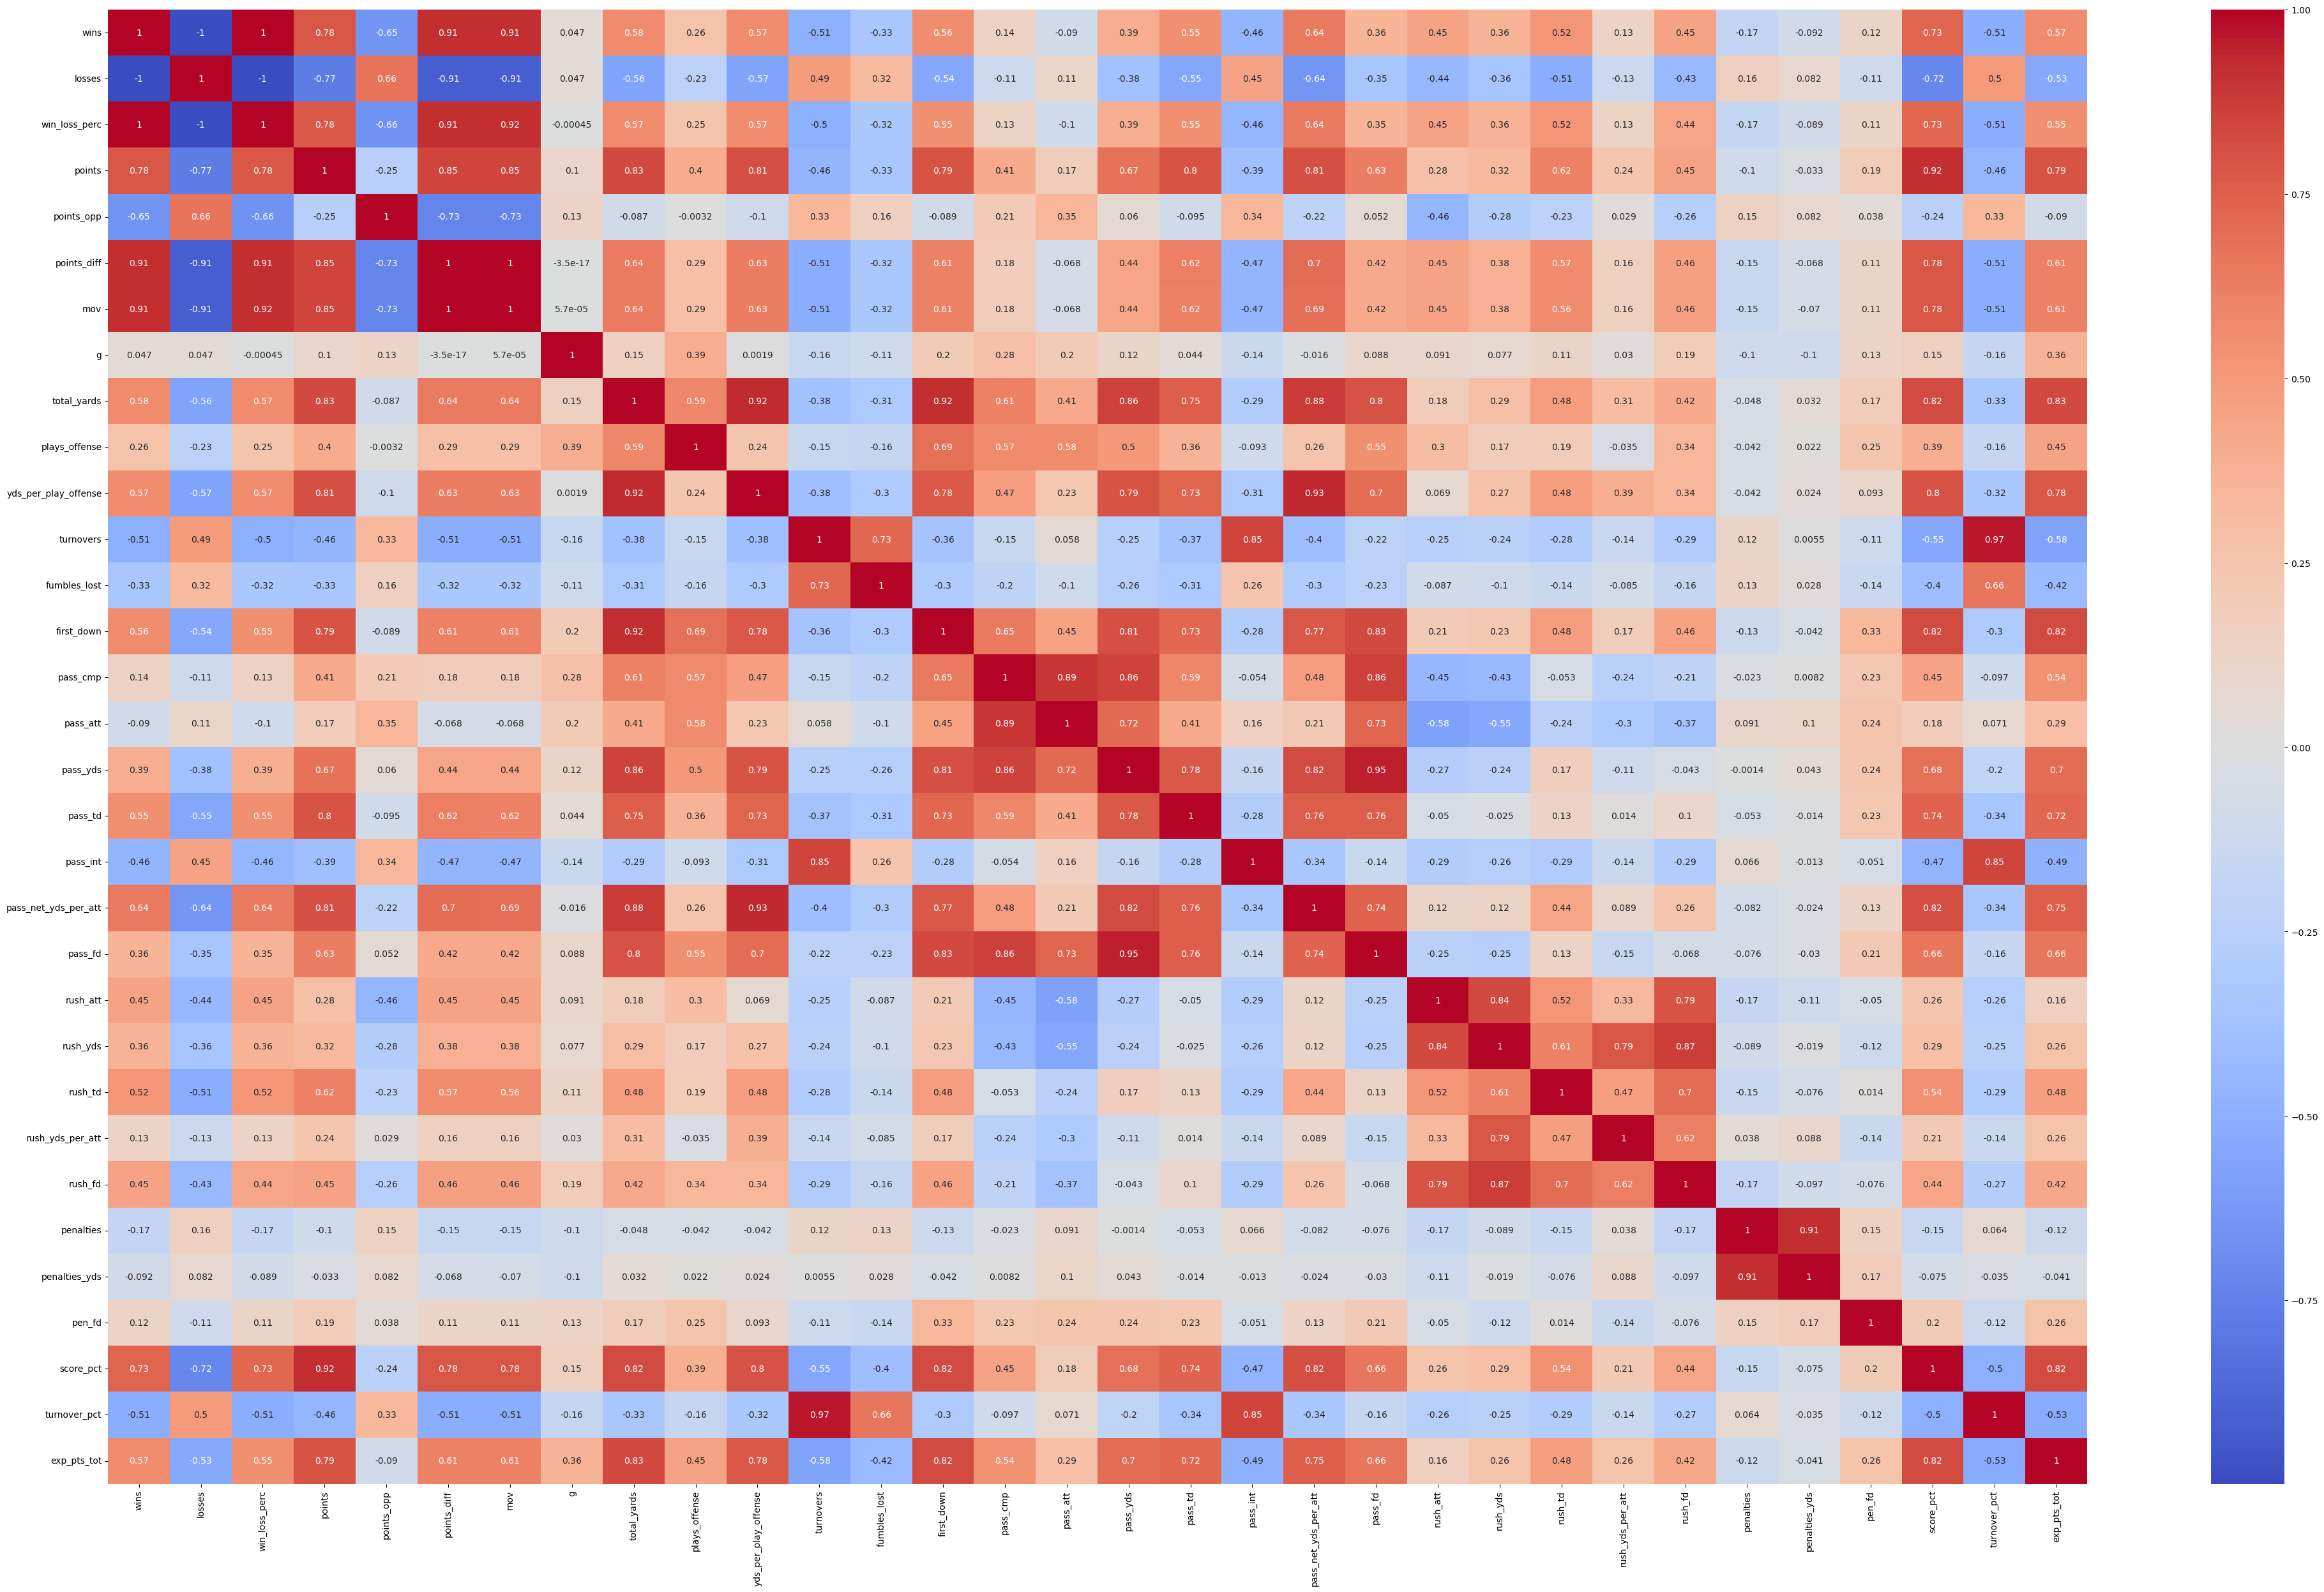

In [127]:
fig, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show

In [87]:
X = stats_df.drop(columns = ['win_loss_perc', 'losses', 'wins'])
y = stats_df['win_loss_perc']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [99]:
stats_linear = LinearRegression()
stats_linear.fit(X_train, y_train)
stats_linear.score(X_test, y_test)

0.8418258666922247

In [101]:
predicted = stats_linear.predict(X_test)
predicted 

array([0.4549106 , 0.58741255, 0.30977539, 0.68503493, 0.46336935,
       0.5618745 , 0.29816969, 0.13067517, 0.80629405, 0.52509501,
       0.50158032, 0.66174365, 0.67711899, 0.53167526, 0.36166015,
       0.5608515 , 0.33400153, 0.52153481, 0.33790683, 0.35233782,
       0.5579532 , 0.54637761, 0.62781274, 0.28983126, 0.74559262,
       0.5730848 , 0.27385904, 0.81033387, 0.675661  , 0.38999168,
       0.57473106, 0.49162863, 0.42397217, 0.84326794, 0.30576765,
       0.53633901, 0.47871466, 0.42215446, 0.8072196 , 0.72934748,
       0.36765227, 0.76673862, 0.20314334, 0.56306214, 0.5065625 ,
       0.40306175, 0.28263309, 0.32682035, 0.55686011, 0.45595961,
       0.59360188, 0.30707852, 0.39526319, 0.38320557, 0.4898727 ,
       0.28247075, 0.63083311, 0.72861983, 0.7452897 , 0.45510001,
       0.7934562 , 0.69283938, 0.45681845, 0.63416026, 0.57532175,
       0.58753872, 0.38940985, 0.66397791, 0.05964713, 0.14817551,
       0.66810287])

In [111]:
rmse = root_mean_squared_error(y_test, predicted)
print(rmse)

0.07507838412605969
